In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
data_raw = pd.read_csv("quake.dat",names=['Focal_depth', 'Latitude', 'Longitude','Richter'], sep=",")
data = data_raw[8:]
data = np.array(data)

In [3]:
print(data.shape)

(2178, 4)


## 数据处理
前2000项为训练集，后178项为测试集

In [4]:
labels = data[:,3]
data_x = data[:,:3]
train_x = data_x[:-178]
test_x = data_x[-178:]
# print(train_x.shape)
# print(test_x)

train_y = labels[:-178]
test_y = labels[-178:]
# print(train_y.shape)
# print(test_y)

## 回归算法

### 1多元线性回归

In [5]:
# 实现线性回归
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_x, train_y)

print(lr.coef_)
print(lr.intercept_)

[ 6.40852170e-06  4.56115577e-04 -4.31906329e-05]
5.976844367376267


In [6]:
# 预测
predict = lr.predict(test_x)
print("预测结果")
print(predict)
print("真实结果")
print(test_y)

预测结果
[5.99470213 5.98750333 5.99620092 5.97079466 5.94628803 5.9962003
 5.9649332  5.96917796 5.96624634 5.97888486 5.97343957 5.99210411
 5.95092913 5.98818485 5.98906357 5.96773135 5.97285183 5.99617312
 5.95288192 5.98433447 5.96753482 5.97216745 6.00743936 5.97318694
 5.9862069  5.98413443 5.96958109 5.96134205 6.00077549 5.98734126
 5.98636751 5.97841349 5.98630712 5.97756366 5.97277191 5.96728288
 5.98794754 5.97767328 5.96991518 6.00794099 5.97251281 5.99166906
 5.99620894 5.9750846  5.97767449 5.98230486 5.99494813 5.96540265
 5.96019073 5.97297903 5.97870906 5.97517513 5.96339885 5.98058928
 5.9690035  5.96307488 5.97714071 5.99621398 5.99118233 5.99081173
 5.97692318 5.99619113 5.99617307 5.99542004 5.95252313 5.98511807
 5.97274306 5.98285253 5.96922617 5.97088158 5.96781832 5.96498539
 5.986813   5.94878921 5.97676919 5.97522804 5.9961857  5.9659349
 5.98419273 5.96511349 5.96511929 5.96499479 5.9650141  5.99525793
 6.01360297 6.00226147 5.98741507 5.9652886  5.97513864 5.9

In [7]:
# 评价结果
MSE = metrics.mean_squared_error(predict, test_y)
RMSE = np.sqrt(metrics.mean_squared_error(predict, test_y))
print("Linear Regression 模型MSE： %.5f" %MSE)
print("Linear Regression 模型RMSE： %.5f" %RMSE)

Linear Regression 模型MSE： 0.03213
Linear Regression 模型RMSE： 0.17926


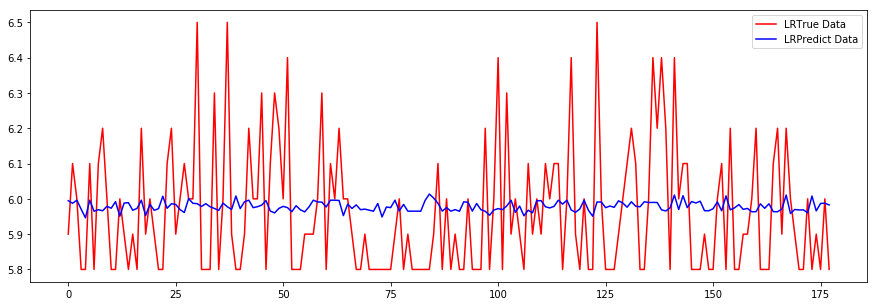

In [10]:
# 可视化(折线图)
plt.figure(figsize=(15,5))
plt.plot(range(len(test_y)), test_y, 'r', label='LRTrue Data')
plt.plot(range(len(predict)), predict, 'b', label='LRPredict Data')
plt.legend()

Text(0,0.5,'LRPredict')

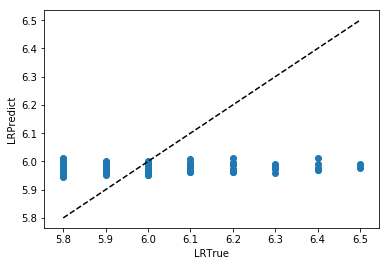

In [53]:
# 可视化(散点图)
plt.scatter(test_y, predict)
plt.plot([test_y.min(),test_y.max()], [test_y.min(),test_y.max()], 'k--')
plt.xlabel('LRTrue')
plt.ylabel('LRPredict')

### 2决策树回归

In [54]:
from sklearn.tree import DecisionTreeRegressor
decisionTree = DecisionTreeRegressor()
decisionTree.fit(train_x, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [55]:
# 预测
predictDT = decisionTree.predict(test_x)
print("预测结果")
print(predictDT)
print("真实结果")
print(test_y)

预测结果
[5.8 6.1 5.9 5.8 6.2 6.1 6.  5.9 5.8 6.1 5.8 5.9 5.8 5.9 6.  6.2 5.8 5.8
 5.8 5.8 5.9 6.1 6.  6.2 6.  6.  5.8 5.8 5.9 6.2 5.8 6.  5.8 6.  5.9 5.9
 5.9 5.8 6.  5.9 5.8 5.9 6.  5.9 5.9 5.8 5.8 6.2 6.3 6.2 5.8 5.9 5.9 5.8
 5.9 5.8 6.  5.9 6.  6.  5.8 5.9 5.8 6.  5.9 6.  5.8 6.5 5.9 6.1 6.1 6.5
 6.2 5.8 5.8 5.8 5.8 5.9 6.  6.  5.8 6.  5.8 5.8 6.2 6.  5.9 5.8 6.2 6.
 5.9 6.  6.1 5.8 5.8 5.8 6.2 6.  5.8 5.9 5.9 5.8 5.8 5.8 5.8 6.2 5.9 6.2
 5.9 5.9 6.1 5.8 6.2 6.2 6.1 6.2 5.8 5.8 5.9 6.2 6.2 6.  5.8 6.1 6.1 5.8
 6.  6.2 5.8 5.8 5.9 6.2 5.9 5.8 5.8 6.3 6.1 6.3 5.8 6.1 5.8 5.9 5.8 5.9
 6.3 6.2 6.2 5.9 5.8 5.9 6.  5.8 5.9 6.1 6.  5.9 6.7 5.9 6.  6.  5.9 6.4
 5.9 5.9 6.  5.8 5.9 5.9 6.  5.8 6.  6.5 6.1 6.3 5.9 5.9 5.9 5.8]
真实结果
[5.9 6.1 6.0 5.8 5.8 6.1 5.8 6.1 6.2 6.0 5.8 5.8 6.0 5.9 5.8 5.9 5.8 6.2
 5.9 6.0 5.9 5.8 5.8 6.1 6.2 5.9 6.0 6.1 6.0 6.0 6.5 5.8 5.8 5.8 6.3 5.8
 6.0 6.5 5.9 5.8 5.8 5.9 6.2 6.0 6.0 6.3 5.8 6.1 6.3 6.2 6.0 6.4 5.8 5.8
 5.8 5.9 5.9 5.9 6.0 6.3 5.8 6.1 6.0 6.2 6.0 6.0 

In [56]:
# 评价结果
MSE = metrics.mean_squared_error(predictDT, test_y)
RMSE = np.sqrt(metrics.mean_squared_error(predictDT, test_y))
print("DecisionTreeRegressor 模型MSE： %.5f" %MSE)
print("DecisionTreeRegressor 模型RMSE： %.5f" %RMSE)

DecisionTreeRegressor 模型MSE： 0.06433
DecisionTreeRegressor 模型RMSE： 0.25363


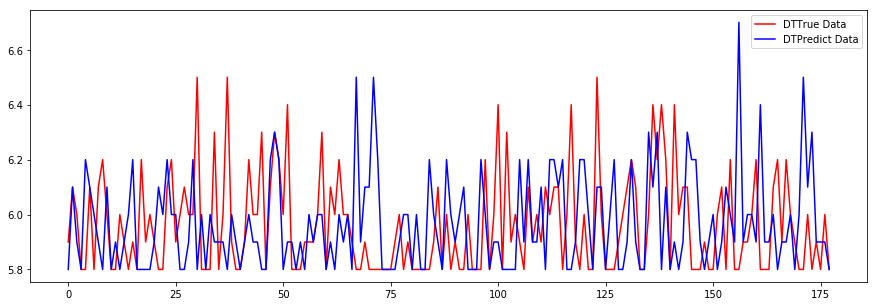

In [57]:
# 可视化(折线图)
plt.figure(figsize=(15,5))
plt.plot(range(len(test_y)), test_y, 'r', label='DTTrue Data')
plt.plot(range(len(predictDT)), predictDT, 'b', label='DTPredict Data')
plt.legend()

Text(0,0.5,'DTPredict')

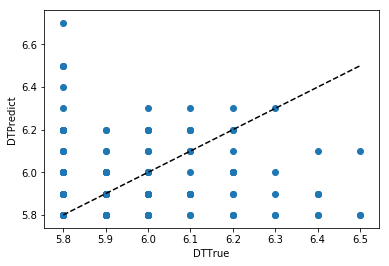

In [58]:
# 可视化(散点图)
plt.scatter(test_y, predictDT)
plt.plot([test_y.min(),test_y.max()], [test_y.min(),test_y.max()], 'k--')
plt.xlabel('DTTrue')
plt.ylabel('DTPredict')

### 3SVM回归

In [59]:
from sklearn.svm import SVR
svrMdl = SVR(C=0.05)
svrMdl.fit(train_x,train_y)

SVR(C=0.05, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [60]:
# 预测
predictSVR = svrMdl.predict(test_x)
print("预测结果")
print(predictSVR)
print("真实结果")
print(test_y)

预测结果
[5.94412637 5.94577104 5.99947024 5.94577104 5.98501731 5.99914572
 5.94767906 5.94577104 5.94565164 5.94577104 5.93639056 5.94466606
 5.94577104 5.94577104 5.93724366 6.00107718 5.94577104 6.00000491
 5.91315432 5.94620004 5.93808932 5.98635717 5.94577104 5.94577104
 5.95580676 5.94668487 5.94581137 5.94573511 5.94577089 5.93975222
 5.91646148 5.95460143 5.94138658 5.94577104 5.95513623 5.94577104
 5.94675439 5.94577105 5.94577104 6.10703575 5.9432164  5.95279333
 5.99909462 5.94577105 5.94577104 5.94577104 5.94577104 5.94577104
 5.94578077 5.9567813  5.94577104 5.94577104 5.94577104 5.94377208
 5.94576896 5.94576957 5.94577839 5.99882321 5.94577104 5.99668521
 5.94577104 5.99941397 5.99879703 5.94577104 5.94577103 5.94727314
 5.94576093 5.94422232 5.94576364 5.94640669 5.94577642 5.94898777
 5.94577958 5.94577105 5.94566944 5.94572036 5.9996115  5.94577104
 5.94577161 5.94425288 5.90090247 5.9027075  5.94577104 5.94672809
 5.94577104 5.94385751 5.94577031 5.99228307 5.94782804 5

In [61]:
# 评价结果
MSE = metrics.mean_squared_error(predictSVR, test_y)
RMSE = np.sqrt(metrics.mean_squared_error(predictSVR, test_y))
print("SVR 模型MSE： %.5f" %MSE)
print("SVR 模型RMSE： %.5f" %RMSE)

SVR 模型MSE： 0.03234
SVR 模型RMSE： 0.17984


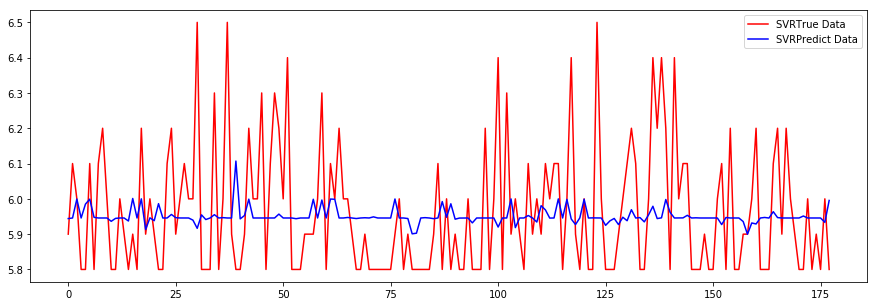

In [62]:
# 可视化(折线图)
plt.figure(figsize=(15,5))
plt.plot(range(len(test_y)), test_y, 'r', label='SVRTrue Data')
plt.plot(range(len(predictSVR)), predictSVR, 'b', label='SVRPredict Data')
plt.legend()

Text(0,0.5,'SVRPredict')

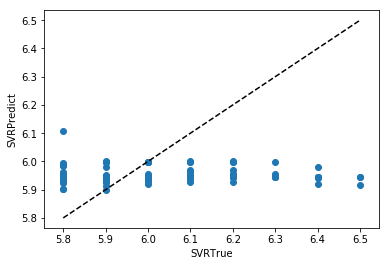

In [63]:
# 可视化(散点图)
plt.scatter(test_y, predictSVR)
plt.plot([test_y.min(),test_y.max()], [test_y.min(),test_y.max()], 'k--')
plt.xlabel('SVRTrue')
plt.ylabel('SVRPredict')

### 4Random Forest回归

In [64]:
from sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor()
randomForest.fit(train_x,train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [65]:
# 预测
predictRF = randomForest.predict(test_x)
print("预测结果")
print(predictRF)
print("真实结果")
print(test_y)

预测结果
[5.87 6.06 5.99 5.87 6.06 6.   6.07 5.96 5.99 5.98 5.88 5.84 5.95 5.93
 6.   6.12 5.95 5.85 5.84 5.99 5.99 5.96 5.92 5.87 6.01 5.93 5.9  5.85
 5.97 5.95 5.81 6.11 5.81 6.12 6.3  5.88 6.04 5.97 6.02 6.18 5.93 6.
 6.1  5.94 5.98 5.97 5.92 5.96 6.04 5.98 5.87 6.03 6.01 6.   6.02 5.92
 5.9  5.9  6.01 6.09 6.01 5.95 5.84 6.08 5.85 5.99 5.92 5.84 5.88 6.
 5.97 5.97 6.19 5.9  6.08 5.89 5.91 5.99 5.87 5.87 5.86 5.81 6.03 5.86
 6.   5.93 5.88 6.05 6.01 5.94 5.91 5.9  6.07 5.95 5.91 5.92 5.9  6.
 5.99 5.91 5.94 6.   6.05 5.93 5.97 5.93 5.92 6.01 5.98 5.86 5.94 5.96
 6.17 5.95 5.85 5.94 5.84 5.93 5.85 6.09 6.17 6.   5.92 5.99 6.08 5.87
 5.91 5.97 5.83 6.04 6.19 6.07 5.87 5.87 5.95 6.17 6.24 6.08 5.89 6.06
 6.   6.11 6.   6.04 6.13 6.18 5.99 5.96 6.   5.95 5.93 5.89 5.9  5.91
 5.93 5.93 5.97 5.95 5.99 5.92 5.94 6.06 5.9  5.96 5.96 5.89 5.95 6.
 5.98 5.88 5.94 6.03 6.03 6.1  5.96 6.01 5.96 6.08]
真实结果
[5.9 6.1 6.0 5.8 5.8 6.1 5.8 6.1 6.2 6.0 5.8 5.8 6.0 5.9 5.8 5.9 5.8 6.2
 5.9 6.0 5.9 5.8 5.8 

In [66]:
# 评价结果
MSE = metrics.mean_squared_error(predictRF, test_y)
RMSE = np.sqrt(metrics.mean_squared_error(predictRF, test_y))
print("RandomForestRegressor 模型MSE： %.5f" %MSE)
print("RandomForestRegressor 模型RMSE： %.5f" %RMSE)

RandomForestRegressor 模型MSE： 0.03511
RandomForestRegressor 模型RMSE： 0.18738


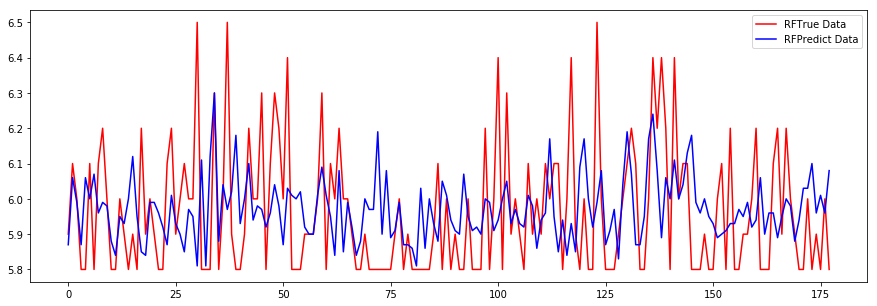

In [67]:
# 可视化(折线图)
plt.figure(figsize=(15,5))
plt.plot(range(len(test_y)), test_y, 'r', label='RFTrue Data')
plt.plot(range(len(predictRF)), predictRF, 'b', label='RFPredict Data')
plt.legend()

Text(0,0.5,'RFPredict')

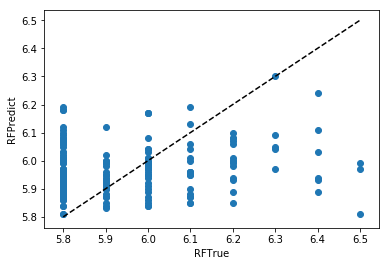

In [68]:
# 可视化(散点图)
plt.scatter(test_y, predictRF)
plt.plot([test_y.min(),test_y.max()], [test_y.min(),test_y.max()], 'k--')
plt.xlabel('RFTrue')
plt.ylabel('RFPredict')

### 5KNN回归

In [69]:
from sklearn.neighbors import KNeighborsRegressor
knnMdl = KNeighborsRegressor()
knnMdl.fit(train_x, train_y)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [70]:
# 预测
predictknn = knnMdl.predict(test_x)
print("预测结果")
print(predictknn)
print("真实结果")
print(test_y)

预测结果
[5.9799999999999995 5.98 5.959999999999999 6.020000000000001
 5.960000000000001 5.9399999999999995 6.000000000000001 6.12 6.04
 5.9799999999999995 5.88 5.86 6.06 5.9799999999999995 6.0 6.08
 5.9799999999999995 5.9799999999999995 5.8 6.08 5.92 6.0 5.959999999999999
 5.94 6.0200000000000005 5.980000000000001 5.98 5.88 5.92 5.98 5.82 5.94
 5.9399999999999995 6.06 6.08 5.880000000000001 6.12 6.04
 5.9399999999999995 6.4 5.840000000000001 6.0200000000000005
 6.119999999999999 5.959999999999999 5.9 5.96 5.880000000000001 6.1
 5.9799999999999995 5.98 5.86 5.880000000000001 5.94 5.92
 5.9799999999999995 5.9 5.9399999999999995 5.9 6.04 6.140000000000001
 6.0600000000000005 5.92 5.96 5.880000000000001 5.88 6.08 5.92
 6.0200000000000005 5.9 6.24 6.139999999999999 5.9799999999999995 6.06 5.9
 5.98 5.98 5.9399999999999995 6.040000000000001 5.9399999999999995
 6.0200000000000005 5.859999999999999 5.859999999999999 6.18 5.92
 5.9799999999999995 5.860000000000001 5.88 5.9799999999999995
 6.020000

In [71]:
# 评价结果
MSE = metrics.mean_squared_error(predictknn, test_y)
RMSE = np.sqrt(metrics.mean_squared_error(predictknn, test_y))
print("KNeighborsRegressor 模型MSE： %.5f" %MSE)
print("KNeighborsRegressor 模型RMSE： %.5f" %RMSE)

KNeighborsRegressor 模型MSE： 0.03684
KNeighborsRegressor 模型RMSE： 0.19194


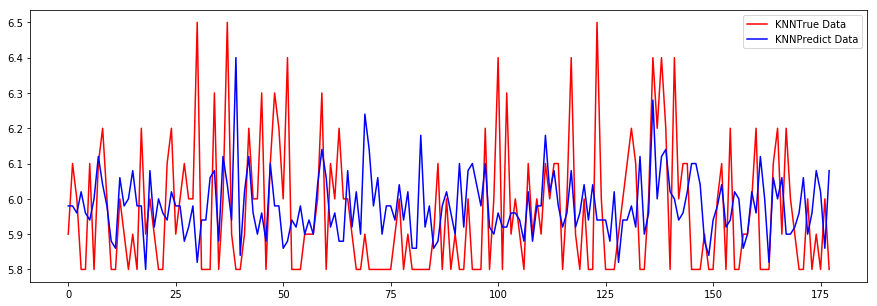

In [72]:
# 可视化(折线图)
plt.figure(figsize=(15,5))
plt.plot(range(len(test_y)), test_y, 'r', label='KNNTrue Data')
plt.plot(range(len(predictknn)), predictknn, 'b', label='KNNPredict Data')
plt.legend()

Text(0,0.5,'KNNPredict')

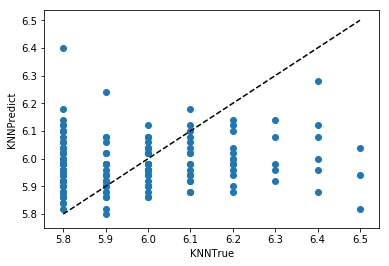

In [73]:
# 可视化(散点图)
plt.scatter(test_y, predictknn)
plt.plot([test_y.min(),test_y.max()], [test_y.min(),test_y.max()], 'k--')
plt.xlabel('KNNTrue')
plt.ylabel('KNNPredict')

### Neural Network--to do